### Libraries that are imported

In [2]:
import pandas as pd 
import numpy as np
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# to convert all categoical features to numeical variable before passing it to the model using one hot encoding
from sklearn.preprocessing import OneHotEncoder
# to perform train test split
from sklearn.model_selection import train_test_split
# to peform feature scalling using standardization
from sklearn.preprocessing import StandardScaler
# importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# impoting library to get accuracy score and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
#importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

Matplotlib is building the font cache; this may take a moment.


In [3]:
df=pd.read_excel(r'C:\Users\KEERTHANA VENKATWSH\Desktop\python\project\supervised-learning\classification\bank_marketing\dataset\bank-marketing.xlsx')

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.shape

(45211, 17)

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# preprocessing techniques

### Data cleaning

#### 1. Finding Unwanted Columns or rows
###### Insight : 
           These is no unwanted columns or rows present in the given dataset to remove

#### 2. Finding Missing Values

In [9]:
features_null= [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_null:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


 #### Insight :
      There is no missing values found in the data set

 #### 3.To find unique values and its value counts in the given Categorical Features in the dataset

In [10]:
list_1=['job','marital','education','default','housing','loan','contact','month','poutcome','y']
for x in list_1:
    print(x,'\n',df[x].unique(),'\n',df[x].value_counts(),'\n','null count=',df[x].isnull().sum(),'\n')

job 
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 
 null count= 0 

marital 
 ['married' 'single' 'divorced'] 
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 
 null count= 0 

education 
 ['tertiary' 'secondary' 'unknown' 'primary'] 
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 
 null count= 0 

default 
 ['no' 'yes'] 
 no     44396
yes      815
Name: default, dtype: int64 
 null count= 0 

housing 
 ['yes' 'no'] 
 yes    25130
no     20081
Name: housing, dtype: int64 
 null count= 0 

loan 
 ['no' 'y

##### Insight : 
    there are 9 categorical features with 1 target variable 
    feature job and month has highest number of categorical values


### Univariate analysis

######  Let us analyse the job feature using bar graph

<AxesSubplot:>

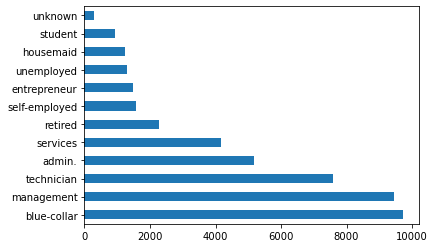

In [11]:
df.job.value_counts().plot.barh()

By seeing the above bar graph we can say that client with job type as blue-collar records are high in given dataset and unknown are very less

###### Let us analyse the marital feature using bar graph

<AxesSubplot:>

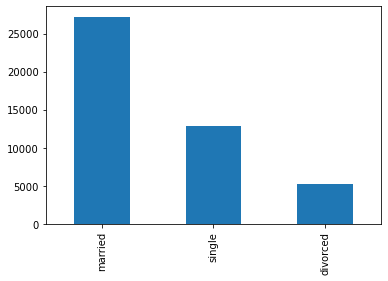

In [12]:
df.marital.value_counts().plot.bar()

By seeing the above bar graph we can say that client who married are high in records in given dataset and divorced are less

###### Let us analyse the education feature using bar graph

<AxesSubplot:>

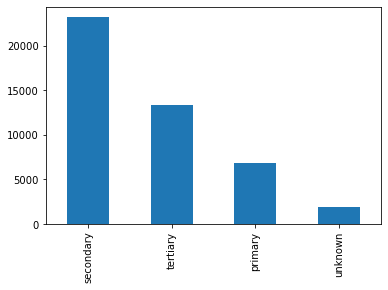

In [13]:
df.education.value_counts().plot.bar()

By seeing the above bar graph we can say that client whose education background is secondary are in high numbers in the given dataset

###### Let us analyse the default feature using bar graph

<AxesSubplot:>

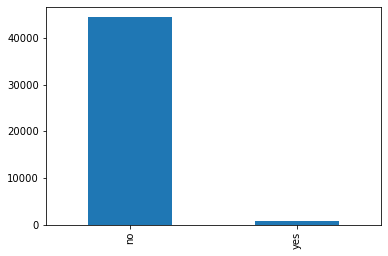

In [14]:
df.default.value_counts().plot.bar()

By seeing the above bar graph we can say that defualt feature has value of no at high ratio to value yes 

###### Let us analyse the housing feature using bar graph

<AxesSubplot:>

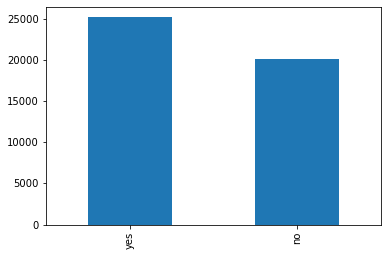

In [15]:
df.housing.value_counts().plot.bar()

By seeing the above bar graph we can say that housing feature has value of yes at high ratio to value no 

###### Let us analyse the loan feature using bar graph

<AxesSubplot:>

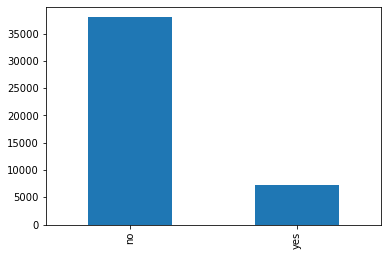

In [16]:
df.loan.value_counts().plot.bar()

By seeing the above bar graph we can say that loan feature has value of no at high ratio to value yes 

###### Let us analyse the month feature using bar graph

<AxesSubplot:>

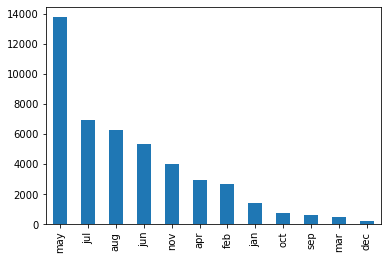

In [17]:
df.month.value_counts().plot.bar()

By seeing the above bar graph we can say that data in month of may is high and less in dec

##### Let us analyse the poutcome feature using bar graph

<AxesSubplot:>

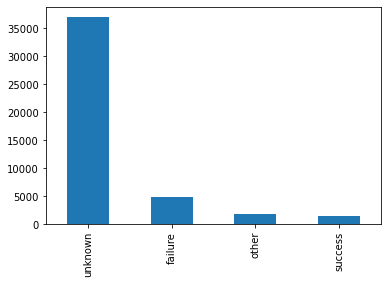

In [18]:
df.poutcome.value_counts().plot.bar()

By seeing the above bar graph we can say that poutcome feature has the value of unknown is high and success rate is less

###### Let us analyse the y feature using bar graph (i.e taget variable)

<AxesSubplot:>

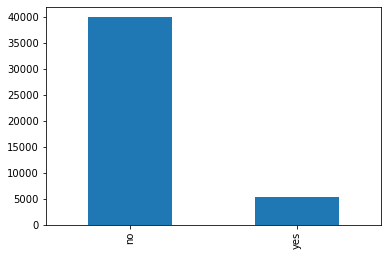

In [19]:
df.y.value_counts().plot.bar()

By seeing the above graph we can say that this is highly imbalance dataset (i.e) the number of client subscribed a term deposit is less where as who do not subscribed a term deposit is high

## Bivariate analysis

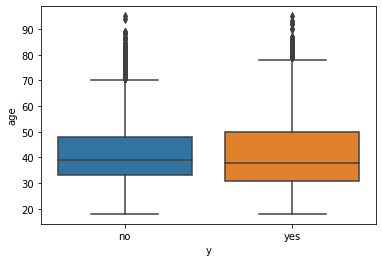

In [20]:
sns.boxplot(data=df,x="y",y="age")
plt.show()

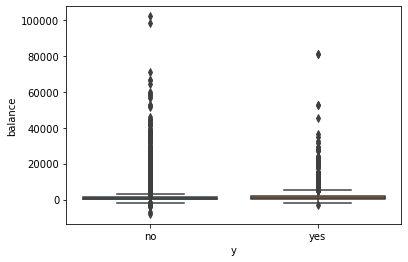

In [21]:
sns.boxplot(data=df,x="y",y="balance")
plt.show()

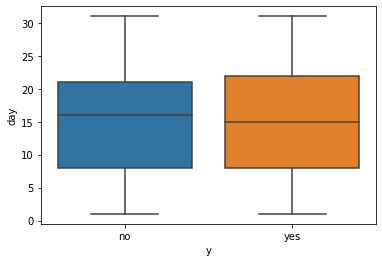

In [22]:
sns.boxplot(data=df,x="y",y="day")
plt.show()

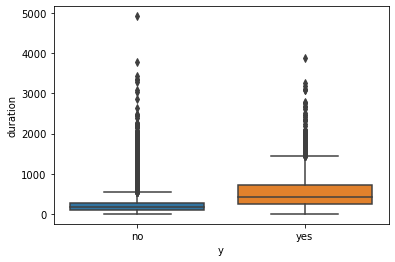

In [23]:
sns.boxplot(data=df,x="y",y="duration")
plt.show()

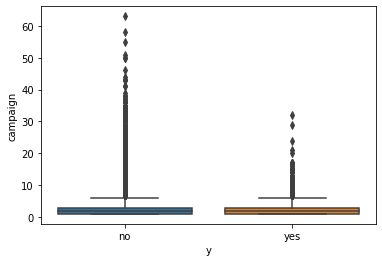

In [24]:
sns.boxplot(data=df,x="y",y="campaign")
plt.show()

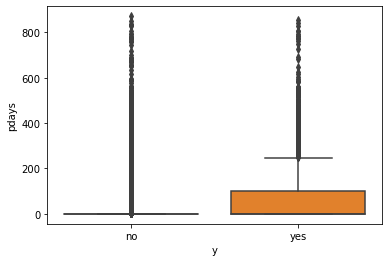

In [25]:
sns.boxplot(data=df,x="y",y="pdays")
plt.show()

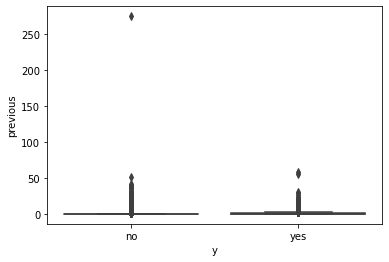

In [26]:
sns.boxplot(data=df,x="y",y="previous")
plt.show()


##### Lets compare the education feature with target variable using bivariate analysis

<AxesSubplot:xlabel='education', ylabel='count'>

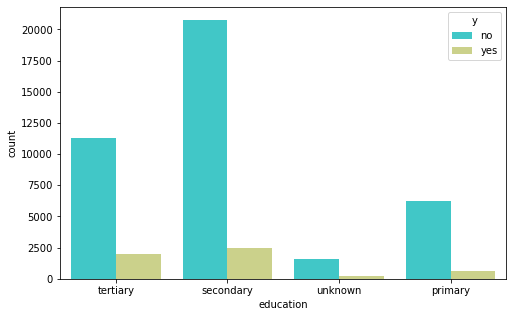

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='education',data=df, palette='rainbow',hue='y')

In [28]:
df['y'][df['education']=='primary'].value_counts(normalize=True)

no     0.913735
yes    0.086265
Name: y, dtype: float64

In [29]:
df['y'][df['education']=='secondary'].value_counts(normalize=True)

no     0.894406
yes    0.105594
Name: y, dtype: float64

In [30]:
df['y'][df['education']=='tertiary'].value_counts(normalize=True)

no     0.849936
yes    0.150064
Name: y, dtype: float64

In [31]:
df['y'][df['education']=='unknown'].value_counts(normalize=True)

no     0.864297
yes    0.135703
Name: y, dtype: float64

##### Insight :
         by seeing the plot we can say that the bank contacted secondary people more but tertiary people subscibed term 
         deposit more compared to all other category 

#### Lets compare the job feature with target variable using bivariate analysis

<AxesSubplot:xlabel='job', ylabel='count'>

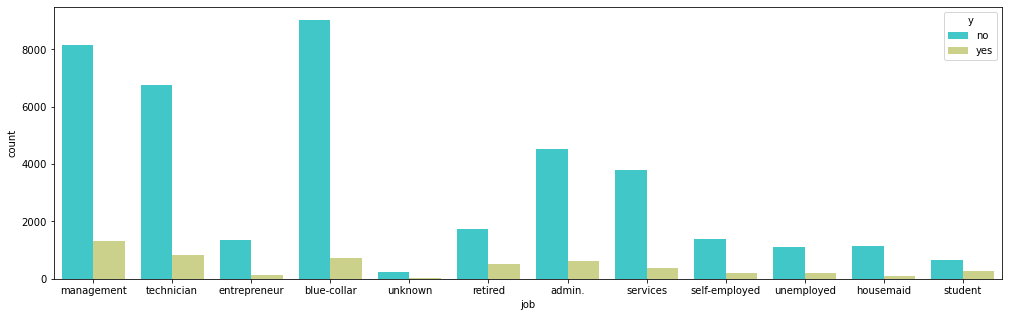

In [32]:
plt.figure(figsize=(17,5))
sns.countplot(x='job',data=df, palette='rainbow',hue='y')

##### Insight:
            by seeing the plot we can say that the bank contacted blue-collar more but the more number of term deposit is
            from the management

##### Lets compare the marital feature with target variable using bivariate analysis

<AxesSubplot:xlabel='marital', ylabel='count'>

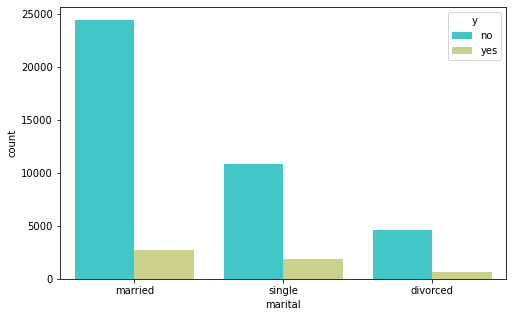

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x='marital',data=df, palette='rainbow',hue='y')

In [34]:
df['y'][df['marital']=='married'].value_counts(normalize=True)

no     0.898765
yes    0.101235
Name: y, dtype: float64

In [35]:
df['y'][df['marital']=='single'].value_counts(normalize=True)

no     0.850508
yes    0.149492
Name: y, dtype: float64

In [36]:
df['y'][df['marital']=='divorced'].value_counts(normalize=True)

no     0.880545
yes    0.119455
Name: y, dtype: float64

##### Insight:
           by seeing the plot we can say that the bank contacted married people more but the more number of term deposit is 
           from single people 

##### Lets compare the default feature with target variable using bivariate analysis

<AxesSubplot:xlabel='default', ylabel='count'>

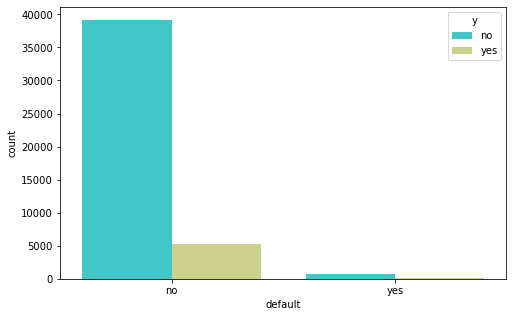

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(x='default',data=df, palette='rainbow',hue='y')

In [38]:
df['y'][df['default']=='no'].value_counts(normalize=True)

no     0.882039
yes    0.117961
Name: y, dtype: float64

In [39]:
df['y'][df['default']=='yes'].value_counts(normalize=True)

no     0.936196
yes    0.063804
Name: y, dtype: float64

##### Insight:
            by seeing the plot we can say that the people who has no default has made the term deposit more

##### Lets compare the housing feature with target variable using bivariate analysis

<AxesSubplot:xlabel='housing', ylabel='count'>

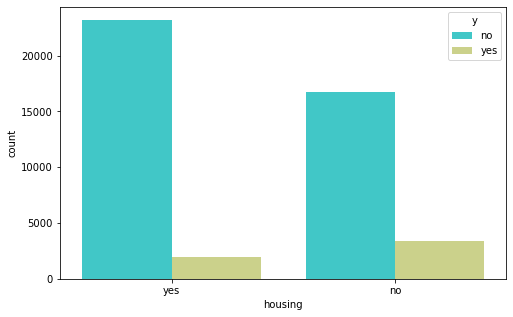

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x='housing',data=df, palette='rainbow',hue='y')

In [41]:
df['y'][df['housing']=='no'].value_counts(normalize=True)

no     0.832976
yes    0.167024
Name: y, dtype: float64

In [42]:
df['y'][df['housing']=='yes'].value_counts(normalize=True)

no     0.923
yes    0.077
Name: y, dtype: float64

##### Insight:
            by seeing the plot we can say that the people who does not have housing loan has made the term deposit more

##### Lets compare the loan feature with target variable using bivariate analysis

<AxesSubplot:xlabel='loan', ylabel='count'>

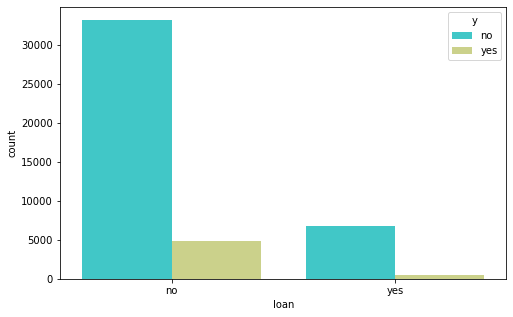

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x='loan',data=df, palette='rainbow',hue='y')

In [44]:
df['y'][df['loan']=='no'].value_counts(normalize=True)

no     0.873443
yes    0.126557
Name: y, dtype: float64

In [45]:
df['y'][df['loan']=='yes'].value_counts(normalize=True)

no     0.933186
yes    0.066814
Name: y, dtype: float64

##### Insight:
            by seeing the plot we can say that the people who does not have personal loan has made the term deposit more

##### Lets compare the contact feature with target variable using bivariate analysis

<AxesSubplot:xlabel='contact', ylabel='count'>

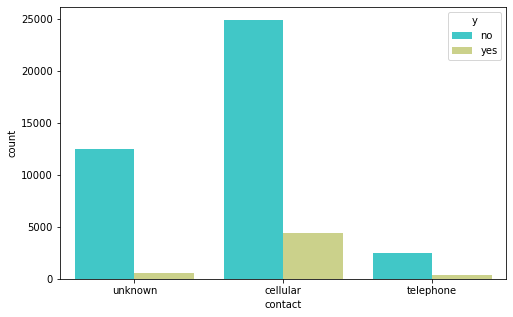

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x='contact',data=df, palette='rainbow',hue='y')

##### Insight:
            by seeing the plot we can say that the bank contacted though cellular made the term deposit more

##### Lets compare the poutcome
feature with target variable using bivariate analysis

<AxesSubplot:xlabel='poutcome', ylabel='count'>

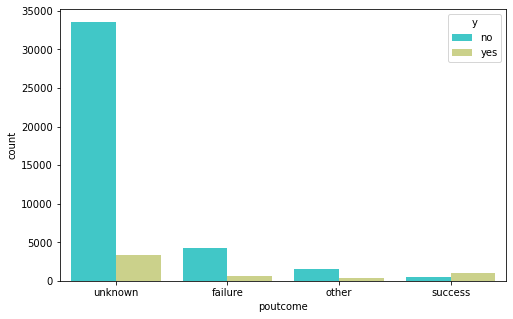

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x='poutcome',data=df, palette='rainbow',hue='y')

##### Insight:
           by seeing the plot we can say that the outcome of the previous marketing campaign unknown made the term deposit
           more

#### Lets check if there is any feature correlated or not

<AxesSubplot:>

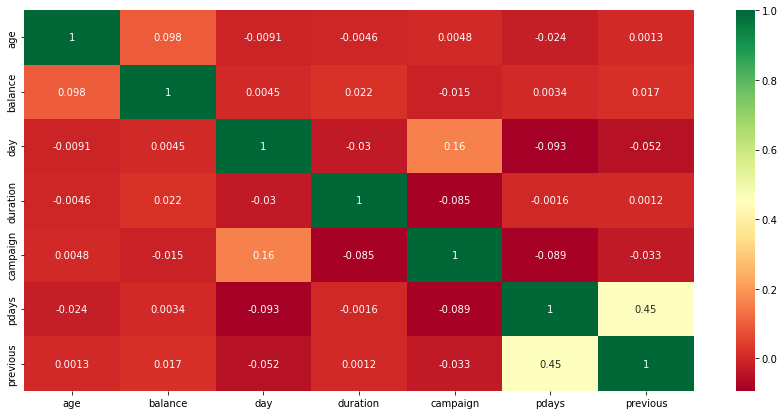

In [48]:
cor_matrix=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_matrix,annot=True,cmap="RdYlGn")

##### Insight :
         It seems no feature is heavily correlated with other features

##### Lets find out Outliers in numerical features

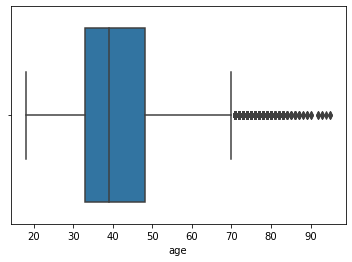

In [49]:
sns.boxplot(data=df,x="age")
plt.show()

##### Insight :
          By seeing the above boxplot we can say that age feature has some outliers 
          

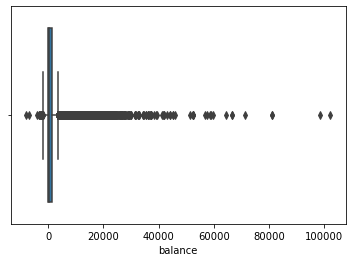

In [50]:
sns.boxplot(data=df,x="balance")
plt.show()

###### Insight :

      By seeing the above boxplot we can say that balance feature has some outliers 
     

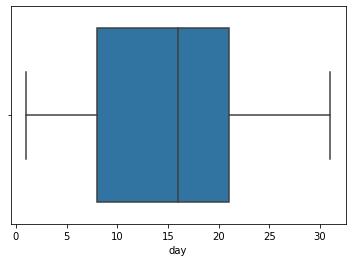

In [51]:
sns.boxplot(data=df,x="day")
plt.show()

##### Insight :

      By seeing the above boxplot we can say that day feature has no outliers 
      

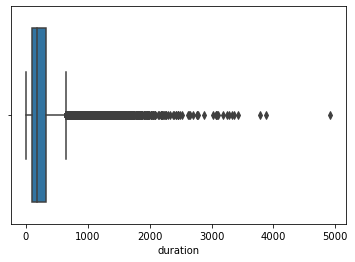

In [52]:
sns.boxplot(data=df,x="duration")
plt.show()

##### Insight :

      By seeing the above boxplot we can say that duration feature has some outliers 
      

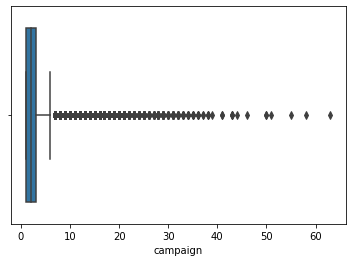

In [53]:
sns.boxplot(data=df,x="campaign")
plt.show()

##### Insight :

      By seeing the above boxplot we can say that campaign feature has some outliers 
      

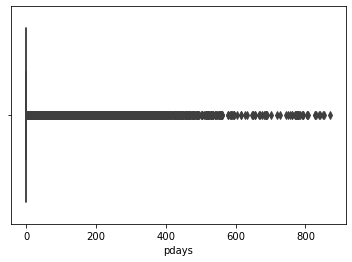

In [54]:
sns.boxplot(data=df,x="pdays")
plt.show()

##### Insight :

      By seeing the above boxplot we can say that pdays feature has some outliers 
      

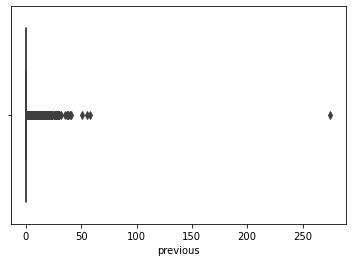

In [55]:
sns.boxplot(data=df,x="previous")
plt.show()

##### Insight :

      By seeing the above boxplot we can say that pevious feature has some outliers 
      

### One Hot Encoding

In [56]:
features=['job','marital','education','default','housing','loan','contact','month','poutcome']

In [57]:
encoding=OneHotEncoder(sparse=False)

In [58]:
encoding_df=pd.DataFrame(encoding.fit_transform(df[features]))
encoding_df  

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
encoding_df.columns = encoding.get_feature_names(features)

C:\Users\KEERTHANA VENKATWSH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
encoding_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
df=pd.concat([df,encoding_df],axis=1)

In [62]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
df[features]

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [64]:
df=df.drop(features,axis=1)

In [65]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,no,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
df['y']=np.where(df.y=="yes",1,0)

In [67]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [68]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   balance              45211 non-null  int64  
 2   day                  45211 non-null  int64  
 3   duration             45211 non-null  int64  
 4   campaign             45211 non-null  int64  
 5   pdays                45211 non-null  int64  
 6   previous             45211 non-null  int64  
 7   y                    45211 non-null  int32  
 8   job_admin.           45211 non-null  float64
 9   job_blue-collar      45211 non-null  float64
 10  job_entrepreneur     45211 non-null  float64
 11  job_housemaid        45211 non-null  float64
 12  job_management       45211 non-null  float64
 13  job_retired          45211 non-null  float64
 14  job_self-employed    45211 non-null  float64
 15  job_services         45211 non-null 

In [70]:
y = df.pop('y')

In [71]:
X=df

In [72]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [74]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [75]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##### Insight:
            here by the use of One Hot Encoding we conveted catagorical feature into numerical feature.
            now the data is ready to split 

### Train test split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 48, stratify = y)
X_train.shape, X_test.shape

((31647, 51), (13564, 51))

##### Insight:
            to train the model we split the dataset into two that is train and split (ie)train=70%,test=30%

### Feature Scaling

In [77]:
num_cols=['age','balance','day','duration','campaign','pdays','previous']

In [78]:
scaler = StandardScaler()

In [79]:
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [80]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
44625,-0.662422,0.008611,-1.777635,-0.136439,-0.579218,0.533432,1.410639,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4716,-0.662422,-0.108241,0.509399,-0.629310,-0.247768,-0.412169,-0.240387,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15170,0.275663,-0.457456,0.148288,0.070880,4.723984,-0.412169,-0.240387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16164,0.181855,-0.393993,0.750139,-0.625398,4.061084,-0.412169,-0.240387,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36557,0.088046,-0.344969,-0.453563,1.263942,-0.579218,-0.412169,-0.240387,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16223,-0.193380,-0.111935,0.870509,-0.484578,0.083682,-0.412169,-0.240387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20499,0.369472,-0.347319,-0.453563,-0.324199,0.415132,-0.412169,-0.240387,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3074,0.275663,0.195643,-0.212822,-0.257701,-0.579218,-0.412169,-0.240387,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28328,-0.287188,0.018685,1.592730,-0.801424,-0.579218,-0.412169,-0.240387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [82]:
X_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
2801,-0.099571,-0.198903,-0.212822,-0.222496,-0.579218,-0.412169,-0.240387,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31765,-0.568614,-0.452083,-0.935044,2.527414,-0.579218,-0.412169,-0.240387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27071,0.557089,-0.484654,0.629769,0.020028,-0.579218,-0.412169,-0.240387,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7819,-1.319082,0.265486,1.713100,-0.003442,1.078032,-0.412169,-0.240387,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23055,0.088046,-0.408767,1.231620,-0.324199,-0.247768,-0.412169,-0.240387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8140,-1.412891,-0.276469,-1.657265,1.338264,-0.247768,-0.412169,-0.240387,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18242,0.932323,-0.325493,1.713100,-0.570635,1.740933,-0.412169,-0.240387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
43015,-1.131465,-0.419513,-0.453563,0.278199,-0.247768,1.438794,1.410639,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14913,0.275663,0.023050,0.027918,-0.226407,-0.247768,-0.412169,-0.240387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##### Insight:
            feature scaling is used to bring all the data in the same range
            here it is done using standadization

### EX:1  DecisionTreeClassifier -base model

In [83]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
y_train_pred = dtc.predict(X_train)

In [85]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[27945,     0],
       [    0,  3702]], dtype=int64)

In [86]:
y_test_pred = dtc.predict(X_test)

In [87]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.8765113535830139


array([[11110,   867],
       [  808,   779]], dtype=int64)

##### Insight: (base model)
            DecisionTreeClassifier 
                        Accuracy :
                                Train-1.0
                                Test-0.8758478324977883
                                

 ### Ex:2 RandomForestClassifier - base model

In [88]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
y_train_pred = rfc.predict(X_train)

In [90]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9999368028565109


array([[27945,     0],
       [    2,  3700]], dtype=int64)

In [91]:
y_test_pred = rfc.predict(X_test)

In [92]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9070333235033913


array([[11655,   322],
       [  939,   648]], dtype=int64)

##### Insight: (base model)
            RandomForestClassifier
                        Accuracy:
                                Test:1.0
                                Train:0.9057800058979653

### Hyper-parameter tuning for DecisionTreeClassifier

In [93]:
dtc = DecisionTreeClassifier(random_state=48)

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [96]:
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [97]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 2.22 s
Wall time: 20.7 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=48), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [98]:
best_dtc=grid_search.best_params_

In [99]:
best_dtc 

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20}

### Ex:3 DecisionTreeClassifier after hyperparameter tuning

In [100]:
dtc = DecisionTreeClassifier(**best_dtc)

In [101]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)

In [102]:
y_train_pred = dtc.predict(X_train)

In [103]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9048251019053939


array([[27328,   617],
       [ 2395,  1307]], dtype=int64)

In [104]:
y_test_pred = dtc.predict(X_test)

In [105]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9020937776467118


array([[11692,   285],
       [ 1043,   544]], dtype=int64)

##### Insight:  (after hyperparameter tuning)
            DecisionTreeClassifier 
                        Accuracy :
                                Train-0.9048251019053939
                                Test-0.9020937776467118
                                

### Hyper-parameter tuning for  RandomForestClassifier

In [106]:
classifier_rfc = RandomForestClassifier(random_state=48)

In [107]:
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [200, 225, 250, 275, 300]
}

In [108]:
grid_search = GridSearchCV(estimator=classifier_rfc, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [109]:
%%time
grid_search.fit(X,y)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits
CPU times: total: 11.1 s
Wall time: 40min 58s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=48), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [200, 225, 250, 275, 300]},
             scoring='accuracy', verbose=1)

In [110]:
best_rfc = grid_search.best_params_

In [111]:
best_rfc 

{'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 50,
 'n_estimators': 250}

### Ex:4 RandomForestClassifier after hyperparameter tuning

In [112]:
rfc = RandomForestClassifier(**best_rfc)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=50,
                       n_estimators=250)

In [113]:
y_train_pred = rfc.predict(X_train)

In [114]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.8831484816886277


array([[27944,     1],
       [ 3697,     5]], dtype=int64)

In [115]:
y_test_pred = rfc.predict(X_test)

In [116]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.8830728398702448


array([[11977,     0],
       [ 1586,     1]], dtype=int64)

##### Insight: (after hyperparameter tuning)
            RandomForestClassifier
                        Accuracy:
                                Test:0.8830220874016494
                                Train:0.8829991153052197